
MÉTODOS DE CLUSTERING

CARGA DE LIBRERIAS


In [ ]:
from matplotlib import style
style
style.use("ggplot")

In [ ]:
import seaborn as sns
sns
from scipy.stats import randint as sp_randint
sp_randint
from sklearn.decomposition import PCA
PCA
from pathlib import Path
Path
import pandas as pd
pd
import numpy as np
np
import matplotlib.pyplot as plt

CARGAR LA DATA

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/tatsath/fin-ml/master/Chapter%208%20-%20Unsup.%20Learning%20-%20Clustering/Data_MasterTemplate.csv", parse_dates=True, index_col=0)
df

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,DWDP,...,NKE,PFE,PG,TRV,UTX,UNH,VZ,V,WMT,WBA
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,29.847043,35.476634,3.530576,26.650218,14.560887,21.582046,43.003876,16.983583,23.522220,NaN,...,4.701180,16.746856,32.227726,20.158885,21.319030,5.841355,22.564221,NaN,47.337599,21.713237
2000-01-04,28.661131,34.134275,3.232839,26.610431,14.372251,21.582046,40.577200,17.040950,24.899860,NaN,...,4.445214,16.121738,31.596399,19.890099,20.445803,5.766368,21.833915,NaN,45.566248,20.907354
2000-01-05,30.122175,33.959430,3.280149,28.473758,14.914205,22.049145,40.895453,17.228147,25.781550,NaN,...,4.702157,16.415912,31.325831,20.085579,20.254784,5.753327,22.564221,NaN,44.503437,21.097421
2000-01-06,31.877325,33.959430,2.996290,28.553331,15.459153,22.903343,39.781569,17.210031,24.899860,NaN,...,4.677733,16.972739,32.438168,20.122232,20.998392,5.964159,22.449405,NaN,45.126952,20.527220
2000-01-07,32.509812,34.433913,3.138219,29.382213,15.962182,23.305926,42.128682,18.342270,24.506249,NaN,...,4.677733,18.123166,35.023602,20.922479,21.830687,6.662948,22.282692,NaN,48.535033,21.051805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-31,200.300000,102.700000,166.440000,385.620000,133.160000,114.650000,47.290000,48.130000,111.520000,53.81,...,81.880000,42.450000,96.470000,125.540000,118.070000,270.200000,55.060000,135.01,95.830000,72.260000
2019-02-01,199.160000,103.060000,166.520000,387.430000,130.910000,118.370000,47.340000,48.700000,111.300000,53.47,...,81.510000,42.880000,97.470000,126.490000,118.980000,268.720000,54.550000,140.15,93.860000,71.880000
2019-02-04,200.210000,103.420000,171.250000,397.000000,130.880000,119.740000,47.350000,49.250000,111.800000,53.13,...,81.990000,42.440000,98.030000,126.040000,119.140000,268.210000,54.040000,141.50,94.770000,71.460000


TRANSFORMACION Y LIMPIEZA DE DATOS

In [ ]:
# Para este paso debemos eliminar algunas columnas
# Eliminación de las columnas "No es un número" para Dow Chemicals (DWDP) y Visa (V)
df.drop(['DWDP', 'V'], axis=1, inplace=True)
df.head(2)

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,XOM,...,MSFT,NKE,PFE,PG,TRV,UTX,UNH,VZ,WMT,WBA
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,29.847043,35.476634,3.530576,26.650218,14.560887,21.582046,43.003876,16.983583,23.52222,23.862240,...,38.135101,4.701180,16.746856,32.227726,20.158885,21.319030,5.841355,22.564221,47.337599,21.713237
2000-01-04,28.661131,34.134275,3.232839,26.610431,14.372251,21.582046,40.577200,17.040950,24.89986,23.405167,...,36.846046,4.445214,16.121738,31.596399,19.890099,20.445803,5.766368,21.833915,45.566248,20.907354


In [ ]:
# Copiar el marco de datos para añadir características
data = pd.DataFrame(df.copy())
data.head(2)

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,XOM,...,MSFT,NKE,PFE,PG,TRV,UTX,UNH,VZ,WMT,WBA
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,29.847043,35.476634,3.530576,26.650218,14.560887,21.582046,43.003876,16.983583,23.52222,23.862240,...,38.135101,4.701180,16.746856,32.227726,20.158885,21.319030,5.841355,22.564221,47.337599,21.713237
2000-01-04,28.661131,34.134275,3.232839,26.610431,14.372251,21.582046,40.577200,17.040950,24.89986,23.405167,...,36.846046,4.445214,16.121738,31.596399,19.890099,20.445803,5.766368,21.833915,45.566248,20.907354


In [ ]:
# Rendimiento diario
# Rendimiento diario (%)
datareturns = np.log(data / data.shift(1))

In [ ]:
datareturns.head()

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,XOM,...,MSFT,NKE,PFE,PG,TRV,UTX,UNH,VZ,WMT,WBA
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,-0.040544,-0.038572,-0.088100,-0.001494,-0.013040,0.000000,-0.058084,0.003372,0.056917,-0.019340,...,-0.034387,-0.055986,-0.038042,-0.019784,-0.013423,-0.041822,-0.012920,-0.032901,-0.038138,-0.037821
2000-01-05,0.049720,-0.005135,0.014528,0.067680,0.037015,0.021412,0.007813,0.010925,0.034797,0.048536,...,0.010511,0.056193,0.018083,-0.008600,0.009780,-0.009387,-0.002264,0.032901,-0.023601,0.009050
2000-01-06,0.056633,0.000000,-0.090514,0.002791,0.035887,0.038009,-0.027615,-0.001052,-0.034797,0.055013,...,-0.034050,-0.005208,0.033357,0.034893,0.001823,0.036055,0.035990,-0.005101,0.013913,-0.027399
2000-01-07,0.019647,0.013875,0.046281,0.028616,0.032021,0.017425,0.057325,0.063716,-0.015934,-0.002939,...,0.013006,0.000000,0.065583,0.076686,0.038999,0.038871,0.110794,-0.007454,0.072806,0.025234


In [ ]:
datareturns_log = pd.DataFrame(datareturns.copy())

Cambio porcentual

In [ ]:
# Daily Linear Returns (%)
datareturns = data.pct_change(1)

In [ ]:
datareturns.head(3)

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,XOM,...,MSFT,NKE,PFE,PG,TRV,UTX,UNH,VZ,WMT,WBA
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,-0.039733,-0.037838,-0.084331,-0.001493,-0.012955,0.000000,-0.056429,0.003378,0.058568,-0.019155,...,-0.033802,-0.054447,-0.037327,-0.019590,-0.013333,-0.040960,-0.012837,-0.032366,-0.037420,-0.037115
2000-01-05,0.050976,-0.005122,0.014634,0.070022,0.037708,0.021643,0.007843,0.010985,0.035409,0.049733,...,0.010567,0.057802,0.018247,-0.008563,0.009828,-0.009343,-0.002262,0.033448,-0.023325,0.009091


In [ ]:
# Dow Jones Equal Weighted rETURN
datareturns["DJIA"] = datareturns.mean(axis=1)
datareturns["DJIA"].head(3)

Date
2000-01-03         NaN
2000-01-04   -0.031058
2000-01-05    0.019281
Name: DJIA, dtype: float64

In [ ]:
# Data Raw
data_raw = datareturns
data_raw.dropna(how='all', inplace=True)
data_raw.head(3)

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,XOM,...,NKE,PFE,PG,TRV,UTX,UNH,VZ,WMT,WBA,DJIA
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-04,-0.039733,-0.037838,-0.084331,-0.001493,-0.012955,0.000000,-0.056429,0.003378,0.058568,-0.019155,...,-0.054447,-0.037327,-0.019590,-0.013333,-0.040960,-0.012837,-0.032366,-0.037420,-0.037115,-0.031058
2000-01-05,0.050976,-0.005122,0.014634,0.070022,0.037708,0.021643,0.007843,0.010985,0.035409,0.049733,...,0.057802,0.018247,-0.008563,0.009828,-0.009343,-0.002262,0.033448,-0.023325,0.009091,0.019281
2000-01-06,0.058268,0.000000,-0.086538,0.002795,0.036539,0.038741,-0.027237,-0.001052,-0.034198,0.056555,...,-0.005194,0.033920,0.035509,0.001825,0.036713,0.036645,-0.005088,0.014011,-0.027027,0.002579


In [ ]:
# Normalizar los rendimientos

data = (data_raw - data_raw.mean()) / data_raw.std()
data.head(3)

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,XOM,...,NKE,PFE,PG,TRV,UTX,UNH,VZ,WMT,WBA,DJIA
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-04,-2.783305,-1.714531,-3.315064,-0.118649,-0.672149,-0.030177,-2.304726,0.236964,3.089027,-1.283097,...,-2.927985,-2.410473,-1.504783,-0.763609,-2.479568,-0.698935,-2.097284,-2.506437,-2.167895,-2.739489
2000-01-05,3.491453,-0.250475,0.522450,3.667073,1.828679,1.321853,0.305449,0.823741,1.857074,3.247575,...,3.023666,1.148279,-0.671468,0.510782,-0.588825,-0.164440,2.128033,-1.568817,0.502376,1.631646
2000-01-06,3.995818,-0.021248,-3.400666,0.108313,1.770951,2.389941,-1.119210,-0.104682,-1.845881,3.696220,...,-0.316511,2.151911,2.659281,0.070428,2.165327,1.801922,-0.346058,0.914757,-1.584911,0.181378


In [ ]:
# Getting rid of the NaN values.
data.dropna(how='any', inplace=True)
data_raw.dropna(how='any', inplace=True)

EDA: VISUALIZACION DE DATOS

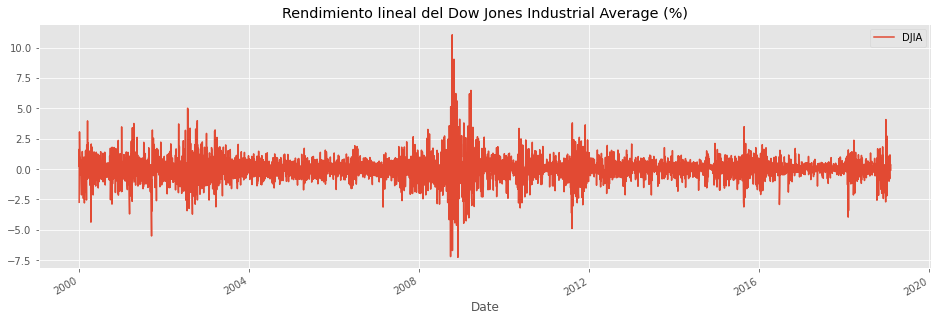

In [ ]:
# Visualizing Log Returns for the DJIA a

plt.figure(figsize=(16, 5))
plt.title("Rendimiento lineal del Dow Jones Industrial Average (%)")
data.DJIA.plot()
plt.grid(True);
plt.legend()
plt.show()

MODELAR: Investigating Hierarchical Clustering

Investigación de la agrupación jerárquica

Un gráfico desordenado de la data ("cambio porcentual diario normalizado") de todas las empresas y su promedio (DJIA)

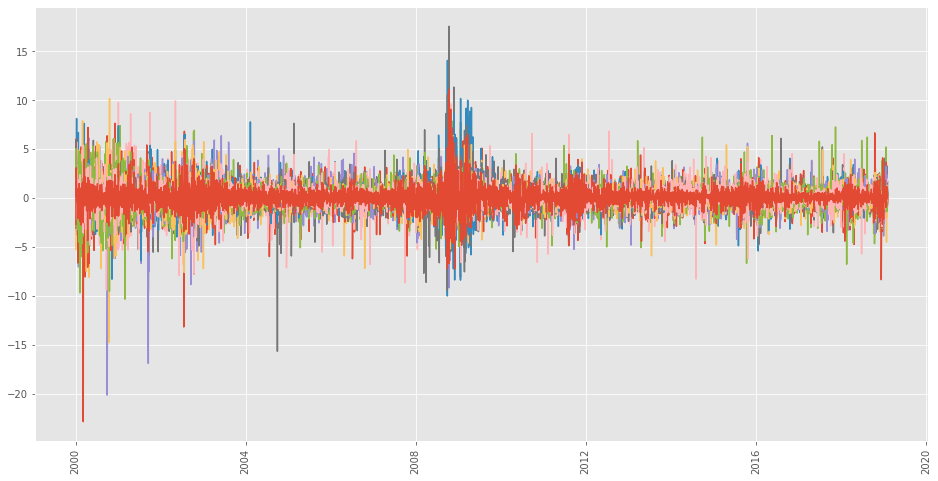

In [ ]:
import matplotlib.cm as cm
cm

%matplotlib inline
plt.figure(figsize=(16, 8))
plt.plot(data);
plt.xticks(rotation='vertical');



encontrar la matriz de correlación, es decir, las "distancias" entre cada acción


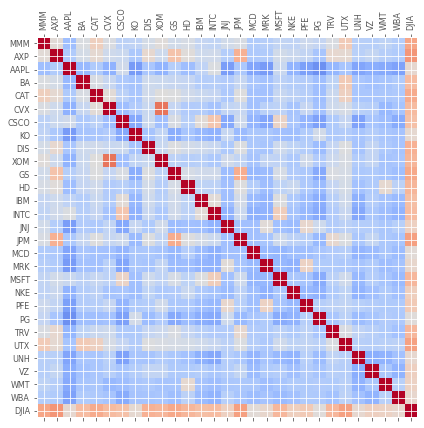

In [ ]:
corr = data.corr()
size = 7
fig, ax = plt.subplots(figsize=(size, size))
ax.matshow(corr,cmap=cm.get_cmap('coolwarm'), vmin=0,vmax=1)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical', fontsize=8);
plt.yticks(range(len(corr.columns)), corr.columns, fontsize=8);

In [ ]:
corr

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,XOM,...,NKE,PFE,PG,TRV,UTX,UNH,VZ,WMT,WBA,DJIA
MMM,1.000000,0.519420,0.307200,0.487751,0.578462,0.481446,0.388405,0.399578,0.468584,0.508008,...,0.401768,0.438288,0.414093,0.482471,0.594654,0.378853,0.372886,0.396899,0.364081,0.715898
AXP,0.519420,1.000000,0.352361,0.465400,0.528225,0.447723,0.437272,0.340595,0.535249,0.444513,...,0.431561,0.407804,0.331315,0.537332,0.529976,0.378942,0.410621,0.368615,0.354729,0.757220
AAPL,0.307200,0.352361,1.000000,0.281480,0.350314,0.259904,0.452315,0.194118,0.333183,0.266097,...,0.269255,0.206184,0.163653,0.273502,0.329271,0.221260,0.249202,0.238139,0.214108,0.536708
BA,0.487751,0.465400,0.281480,1.000000,0.478080,0.422008,0.346383,0.326861,0.445153,0.435283,...,0.366157,0.360989,0.308054,0.397600,0.600781,0.335030,0.319057,0.329287,0.352272,0.649008
CAT,0.578462,0.528225,0.350314,0.478080,1.000000,0.517309,0.384010,0.332096,0.451405,0.501830,...,0.389616,0.367532,0.308474,0.432162,0.571543,0.334838,0.332725,0.336586,0.344036,0.699669
CVX,0.481446,0.447723,0.259904,0.422008,0.517309,1.000000,0.303540,0.358820,0.426709,0.829217,...,0.325664,0.414069,0.317788,0.441427,0.469698,0.380304,0.367868,0.281298,0.325139,0.653203
CSCO,0.388405,0.437272,0.452315,0.346383,0.384010,0.303540,1.000000,0.232116,0.435314,0.310941,...,0.334074,0.271990,0.210501,0.350928,0.415994,0.213765,0.329389,0.302613,0.239173,0.636187
KO,0.399578,0.340595,0.194118,0.326861,0.332096,0.358820,0.232116,1.000000,0.326116,0.402611,...,0.306909,0.354203,0.457491,0.350757,0.360914,0.329015,0.364773,0.334486,0.321177,0.534215
DIS,0.468584,0.535249,0.333183,0.445153,0.451405,0.426709,0.435314,0.326116,1.000000,0.428137,...,0.395780,0.364318,0.297936,0.414784,0.494157,0.325057,0.406450,0.345584,0.325951,0.686259
XOM,0.508008,0.444513,0.266097,0.435283,0.501830,0.829217,0.310941,0.402611,0.428137,1.000000,...,0.346154,0.451451,0.355565,0.439752,0.480032,0.361905,0.406533,0.324881,0.335232,0.669936


Clusters of Correlation - Agglomerate

Grupos de Correlación - Aglomerados

El siguiente paso es buscar grupos de correlaciones mediante la técnica de agrupación jerárquica aglomerada. Su principal ventaja sobre otros métodos de agrupación es que no es necesario adivinar de antemano cuántos clusters puede haber. La agrupación jerárquica aglomerada asigna primero cada punto de datos a su propio clúster, y fusiona gradualmente los clústeres hasta que sólo queda uno. A continuación, el usuario debe elegir un umbral de corte y decidir cuántos clústeres hay.

Linkage realiza la agrupación real en una línea de código, y devuelve una lista de los clusters unidos en el formato Z=[stock_1, stock_2, distancia, sample_count]

También hay diferentes opciones para la medición de la distancia. La opción que elegiremos es la medición de la distancia media, pero son posibles otras (ward, single, centroid, etc.).

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
dendrogram
linkage
Z = linkage(corr, 'average')
Z

array([[ 5.        ,  9.        ,  0.27207065,  2.        ],
       [10.        , 15.        ,  0.45595649,  2.        ],
       [ 1.        , 30.        ,  0.53472591,  3.        ],
       [ 6.        , 13.        ,  0.55217128,  2.        ],
       [ 0.        , 23.        ,  0.59795924,  2.        ],
       [18.        , 32.        ,  0.63802964,  3.        ],
       [ 4.        , 33.        ,  0.6421695 ,  3.        ],
       [17.        , 20.        ,  0.65092769,  2.        ],
       [14.        , 36.        ,  0.6956485 ,  3.        ],
       [12.        , 34.        ,  0.71936254,  4.        ],
       [ 3.        , 35.        ,  0.73536588,  4.        ],
       [ 8.        , 31.        ,  0.76549928,  4.        ],
       [ 7.        , 21.        ,  0.78186826,  2.        ],
       [11.        , 26.        ,  0.78217715,  2.        ],
       [22.        , 40.        ,  0.79465521,  5.        ],
       [39.        , 43.        ,  0.83270992,  9.        ],
       [19.        , 42.

In [ ]:
type(Z)

numpy.ndarray

In [ ]:
Z[0]

array([5.        , 9.        , 0.27207065, 2.        ])

EVALUACION DE CALIDAD DEL MODELAMIENTO: Coeficiente de correlación cofénica

Es importante tener una idea de lo bien que funciona el clustering. Una medida es el Coeficiente de Correlación Cofénica, c. Éste compara (correlaciona) las distancias reales entre pares de todas sus muestras con las implícitas en la agrupación jerárquica. Cuanto más se acerque c a 1, mejor conservará el clustering las distancias originales. Por lo general, c > 0,7 se considera un buen ajuste del cluster. Por supuesto, es posible realizar otras comprobaciones de precisión.

In [ ]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import pylab
c, coph_dists = cophenet(Z, pdist(corr))
c

0.7996812457331596

Dendogram

La mejor manera de visualizar un algoritmo de aglomeración es mediante un dendograma, que muestra un árbol de clusters, siendo las hojas las poblaciones individuales y la raíz el cluster único final. La "distancia" entre cada conglomerado se muestra en el eje y, por tanto, cuanto más largas sean las ramas, menos correlacionados estarán dos conglomerados.

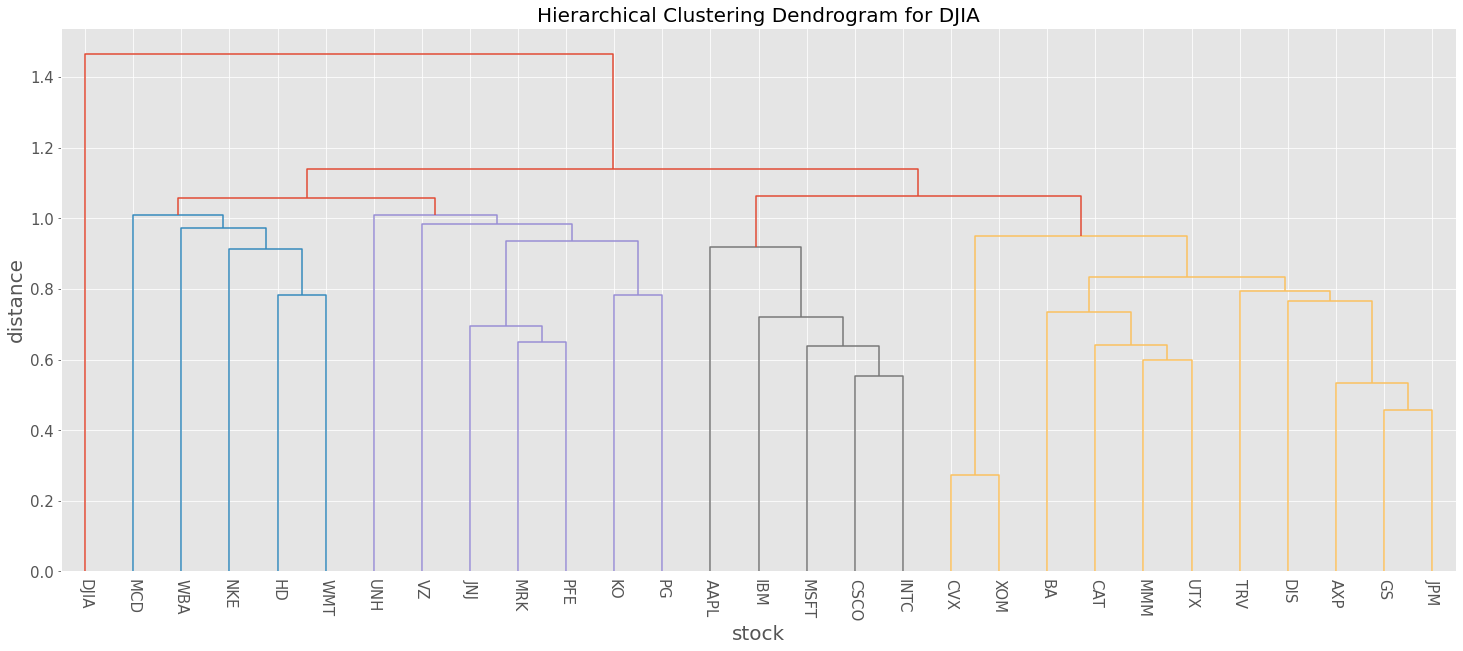

In [ ]:
plt.figure(figsize=(25, 10))
labelsize=20
ticksize=15
plt.title('Hierarchical Clustering Dendrogram for '+"DJIA", fontsize=labelsize)
plt.xlabel('stock', fontsize=labelsize)
plt.ylabel('distance', fontsize=labelsize)
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    labels = corr.columns
)
pylab.yticks(fontsize=ticksize)
pylab.xticks(rotation=-90, fontsize=ticksize)
plt.savefig('dendogram_'+'DJIA'+'.png')
plt.show()

Según el dendograma anterior, los dos valores más correlacionados son CVX y XOM. Es decir, Chevron Corporation y ExxonMobil. Ambas empresas son petroleras, por lo que es lógico que estén fuertemente correlacionadas. Vamos a trazarlas a continuación para ver visualmente lo bien que se correlacionan. Además, elijamos dos acciones que no estén bien correlacionadas en absoluto para compararlas con, por ejemplo, MCD y JPM.

Plotear las correlaciones de las muestras

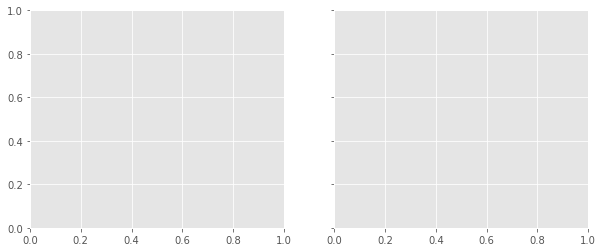

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4), sharey=True)

In [ ]:
plt.subplots_adjust(wspace=0.05)

<Figure size 432x288 with 0 Axes>

Caso de Alta Correlación

In [ ]:
sA = "CVX"
sB = "XOM"

In [ ]:
ax1.plot(data[sA],label=sA)
ax1.plot(data[sB],label=sB)

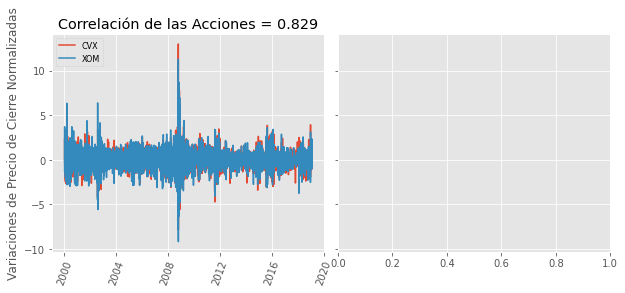

In [ ]:
#plot sample correlations
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4), sharey=True)
plt.subplots_adjust(wspace=0.05)

#high correlation
sA = "CVX"
sB = "XOM"
ax1.plot(data[sA],label=sA)
ax1.plot(data[sB],label=sB)
ax1.set_title('Correlación de las Acciones = %.3f'%corr[sA][sB])
ax1.set_ylabel('Variaciones de Precio de Cierre Normalizadas')
ax1.legend(loc='upper left',prop={'size':8})
plt.setp(ax1.get_xticklabels(), rotation=70);

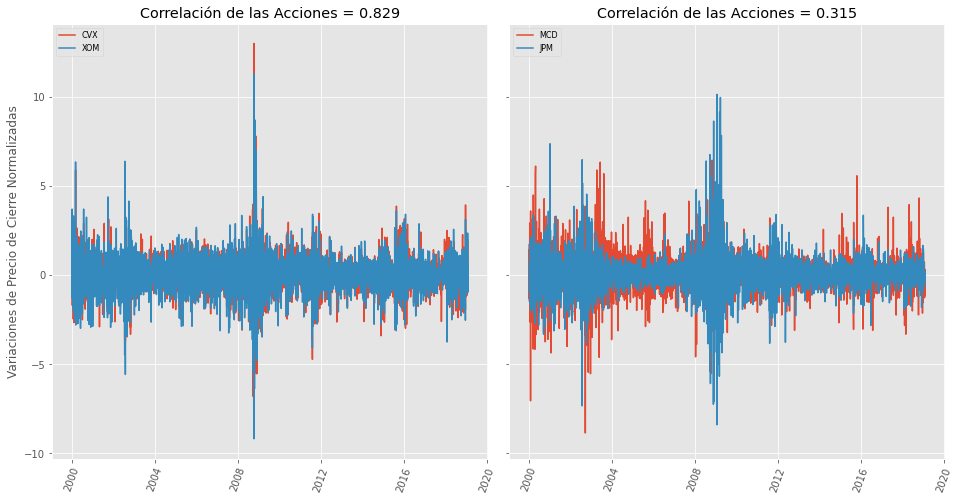

In [ ]:
#plot sample correlations
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8), sharey=True)
plt.subplots_adjust(wspace=0.05)

#high correlation
sA = "CVX"
sB = "XOM"
ax1.plot(data[sA],label=sA)
ax1.plot(data[sB],label=sB)
ax1.set_title('Correlación de las Acciones = %.3f'%corr[sA][sB])
ax1.set_ylabel('Variaciones de Precio de Cierre Normalizadas')
ax1.legend(loc='upper left',prop={'size':8})
plt.setp(ax1.get_xticklabels(), rotation=70);

#low correlation
sA = "MCD"
sB = "JPM"
ax2.plot(data[sA],label=sA)
ax2.plot(data[sB],label=sB)
ax2.set_title('Correlación de las Acciones = %.3f'%corr[sA][sB])
ax2.legend(loc='upper left',prop={'size':8})
plt.setp(ax2.get_xticklabels(), rotation=70);